
## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Reading HTML, EXCEL, CSV tables and SQL Connection  as Pandas Dataframe </p>

### Creation of fancy table of contents which contains links to section of doc:

1. Use "the a tag <a class="anchor" id="2"></a>" after the header which is created in markdown.
2. Use "s1. [CSV Read](#2)" structure in table of contents.

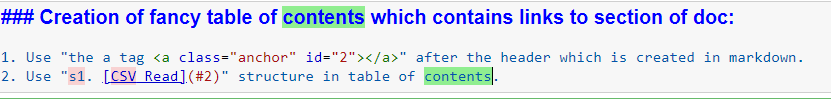

# **Table of Contents**

1. [Import Library](#1)
1. [CSV Read](#2)
1. [CSV Output](#3)
1. [Excel Input](#4)

---
# 📤 **Import Library** <a class="anchor" id="1"></a>
---

In [16]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

---
# 💾 **CSV Read** <a class="anchor" id="2"></a>
---

In [17]:
pd.read_csv("sample_comma.csv")

,name,age,job
0,Murat,25,data_scintist
1,Hande,28,data_analyst
2,Ezgi,23,Hr


In [90]:
# CSV dosyamiz comma separated degil de semicolon separated oldugundan 
#--Noktali virgül ile ayrildigindan separator'u noktali virgul (semi-colon) olarak vermeliyiz.

pd.read_csv("sample_semicolon.csv") 


,name;age;job
0,Murat;25;data_scintist
1,Hande;28;data_analyst
2,Ezgi;23;Hr


In [19]:
pd.read_csv("sample_semicolon.csv", sep=";")

,name,age,job
0,Murat,25,data_scintist
1,Hande,28,data_analyst
2,Ezgi,23,Hr


In [91]:
# 0'inci sutun index olarak kullanilsin.

pd.read_csv("sample_semicolon.csv", sep=";", index_col=0)

,age,job
name,,
Murat,25,data_scintist
Hande,28,data_analyst
Ezgi,23,Hr


In [92]:
#Yukarida comma separated, semi-colon separated dosya tiplerini görmüstuk.
# Bir de Tab separated dosya tipi var.
# Dikkat!!! Ücününde uzantisi csv(comma separated values).

pd.read_csv("sample_tab.csv")

,name\tage\tjob
0,Murat\t25\tdata_scintist
1,Hande\t28\tdata_analyst
2,Ezgi\t23\tHr


In [93]:
pd.read_csv("sample_tab.csv", sep="\t") #Separator tab olarak verilmeli.

,name,age,job
0,Murat,25,data_scintist
1,Hande,28,data_analyst
2,Ezgi,23,Hr


In [94]:
pd.read_csv("sample_unwanted.csv") #Tekrar normal csv dosyamiza odaklaniyoruz. Ilk satir header olmali.

,name,age,job
0,name,age,job
1,Murat,yirmibes,data_scintist
2,Hande,28,data_analyst
3,Ezgi,23,Hr


In [99]:
#Make the first row header

In [95]:
#pd.read_csv("sample_unwanted.csv", header=1) 
#1.satiri header olarak kullanmis olduk. Header = 1. Satir 
# Fakat numaralar index olarak calismaz direk 1'den baslar. (Normalde header olan satirin index'i 0 fakat burda direk row number-satir numarasi esas alinmis oldu.)

In [100]:
#Make the second row header of the table

In [96]:
pd.read_csv("sample_unwanted.csv", header=2)

,Murat,yirmibes,data_scintist
0,Hande,28,data_analyst
1,Ezgi,23,Hr


In [97]:
pd.read_csv("sample_unwanted.csv") # Age sutununda "yirmibes" degeri var ve bu diger integer lar ile uyumlu degil

,name,age,job
0,name,age,job
1,Murat,yirmibes,data_scintist
2,Hande,28,data_analyst
3,Ezgi,23,Hr


In [98]:
pd.read_csv("sample_unwanted.csv", na_values="yirmibes", header=1) # "Yirmibes" NaN olarak degismis oldu. Ileride cleaning yaparken NaN degerleri ile zaten ugrasilacak.

,name,age,job
0,Murat,NaN,data_scintist
1,Hande,28.0,data_analyst
2,Ezgi,23.0,Hr



---
#  **CSV Output** <a class="anchor" id="3"></a>
---





In [36]:
df = pd.read_csv("sample_unwanted.csv", na_values="yirmibes", header=1)
df

,name,age,job
0,Murat,NaN,data_scintist
1,Hande,28.0,data_analyst
2,Ezgi,23.0,Hr


In [37]:
df.to_csv("final.csv") # Save as a new .csv file

In [38]:
pd.read_csv("final.csv")

,Unnamed: 0,name,age,job
0,0,Murat,NaN,data_scintist
1,1,Hande,28.0,data_analyst
2,2,Ezgi,23.0,Hr


In [101]:
df.to_csv("final.nonindex.csv", index = False) #Index'im olmasin diyoruz. Unnamed:0 sutunu haric tutulacak.

In [40]:
pd.read_csv("final.nonindex.csv")

,name,age,job
0,Murat,NaN,data_scintist
1,Hande,28.0,data_analyst
2,Ezgi,23.0,Hr


---
# 💾 **Excel Input** <a class="anchor" id="4"></a>
---

In [41]:
!pip install openpyxl

In [102]:
pd.read_excel("sample_excel_1.xlsx") #Dikkat!! Burasi eger birden fazla worksheet var ise ilk worksheet'i getirir.

,a,b,c,d
0,1,8,15,3
1,2,9,227,11
2,32,52,125,5
3,4,15,3,1


In [103]:
df_excel_1 = pd.read_excel("sample_excel_1.xlsx", sheet_name="Sayfa1")
df_excel_1

,a,b,c,d
0,1,8,15,3
1,2,9,227,11
2,32,52,125,5
3,4,15,3,1


In [142]:
df_excel_2 = pd.read_excel("sample_excel_1.xlsx", sheet_name="Sayfa2", index_col=0)
df_excel_2

,personal,personal.1,general
0,,,
0,name,age,job
1,Murat,25,data_scintist
2,Hande,28,data_analyst
3,Ezgi,23,Hr


In [143]:
df_excel_1 = pd.read_excel("sample_excel_1.xlsx", sheet_name="Sayfa2", header=1)
df_excel_1

,0,name,age,job
0,1,Murat,25,data_scintist
1,2,Hande,28,data_analyst
2,3,Ezgi,23,Hr


In [144]:
pd.read_excel("sample_excel_1.xlsx", sheet_name="Sayfa2", header=1, index_col=0) #Üstteki 0'in sutun index olsun dedik.

,name,age,job
0,,,
1,Murat,25,data_scintist
2,Hande,28,data_analyst
3,Ezgi,23,Hr


In [145]:
df_excel_dict = pd.read_excel("sample_excel_1.xlsx", sheet_name=None) #Dictionary halinde tüm worksheetler gelir.
df_excel_dict 

{'Sayfa1':     a   b    c   d
 0   1   8   15   3
 1   2   9  227  11
 2  32  52  125   5
 3   4  15    3   1,
 'Sayfa2':    0 personal personal.1        general
 0  0     name        age            job
 1  1    Murat         25  data_scintist
 2  2    Hande         28   data_analyst
 3  3     Ezgi         23             Hr}

In [146]:
type(df_excel_dict)

dict

In [147]:
df_excel_dict.keys()

dict_keys(['Sayfa1', 'Sayfa2'])

In [148]:
df_excel_dict.values()

dict_values([    a   b    c   d
0   1   8   15   3
1   2   9  227  11
2  32  52  125   5
3   4  15    3   1,    0 personal personal.1        general
0  0     name        age            job
1  1    Murat         25  data_scintist
2  2    Hande         28   data_analyst
3  3     Ezgi         23             Hr])

## Excel Output

In [149]:
df_excel_1

,0,name,age,job
0,1,Murat,25,data_scintist
1,2,Hande,28,data_analyst
2,3,Ezgi,23,Hr


In [150]:
df_excel_1.to_csv("sample_excel_to_csv_file.csv", index=False)

In [151]:
df_excel_1.to_excel("sample_excel_output.xlsx", index=False)

In [152]:
pd.read_excel("sample_excel_output.xlsx")

,0,name,age,job
0,1,Murat,25,data_scintist
1,2,Hande,28,data_analyst
2,3,Ezgi,23,Hr


In [153]:
df_excel_1

,0,name,age,job
0,1,Murat,25,data_scintist
1,2,Hande,28,data_analyst
2,3,Ezgi,23,Hr


In [154]:
# Tek bir code ile birden fazla worksheeti ayni file ile kaydetmek.

In [158]:
df_excel_1

,0,name,age,job
0,1,Murat,25,data_scintist
1,2,Hande,28,data_analyst
2,3,Ezgi,23,Hr


In [159]:
df_excel_2

,personal,personal.1,general
0,,,
0,name,age,job
1,Murat,25,data_scintist
2,Hande,28,data_analyst
3,Ezgi,23,Hr


In [155]:
with pd.ExcelWriter("Combined_1.xlsx") as writer:
    df_excel_1.to_excel(writer, sheet_name="garip_sayilar")
    df_excel_2.to_excel(writer, sheet_name="personel_bilgileri", index=False)

In [156]:
pd.read_excel("Combined_1.xlsx", sheet_name="personel_bilgileri")

,personal,personal.1,general
0,name,age,job
1,Murat,25,data_scintist
2,Hande,28,data_analyst
3,Ezgi,23,Hr


In [157]:
pd.read_excel("Combined_1.xlsx", sheet_name="garip_sayilar")

,Unnamed: 0,0,name,age,job
0,0,1,Murat,25,data_scintist
1,1,2,Hande,28,data_analyst
2,2,3,Ezgi,23,Hr


## Read HTML

In [160]:
conda install lxml

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [161]:
!pip install lxml
!pip install html5lib
!pip install BeautifulSoup4

https://hsgm.saglik.gov.tr/tr/haberler/yetkilendirilmis-covi-d-19-tani-laboratuvarlari.html

In [162]:
url = "https://hsgm.saglik.gov.tr/tr/haberler/yetkilendirilmis-covi-d-19-tani-laboratuvarlari.html"

In [163]:
df_covid = pd.read_html(url)
df_covid

[       0                      1                    2  \
 0     NO  YETKİLENDİRME GRUP NO                   İL   
 1      1                      1                ADANA   
 2      2                      3                ADANA   
 3      3                      5                ADANA   
 4      4                      5                ADANA   
 ..   ...                    ...                  ...   
 519  519                      2            ZONGULDAK   
 520  520                      5            ZONGULDAK   
 521  521                      7  ZONGULDAK-K. EREĞLİ   
 522  522                      6  ZONGULDAK-K. EREĞLİ   
 523  523                      8  ZONGULDAK-K. EREĞLİ   
 
                                                      3  
 0                                                KURUM  
 1    ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...  
 2                                ADANA ŞEHİR HASTANESİ  
 3              ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ  
 4                      

In [164]:
df_covid[0]

,0,1,2,3
0,NO,YETKİLENDİRME GRUP NO,İL,KURUM
1,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
2,2,3,ADANA,ADANA ŞEHİR HASTANESİ
3,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
4,4,5,ADANA,SEYHAN DEVLET HASTANESİ
...,...,...,...,...
519,519,2,ZONGULDAK,ZONGULDAK BÜLENT ECEVİT ÜNİVERSİTESİ TIP FAKÜL...
520,520,5,ZONGULDAK,ZONGULDAK ATATÜRK DEVLET HASTANESİ
521,521,7,ZONGULDAK-K. EREĞLİ,KARADENİZ EREĞLİ DEVLET HASTANESİ
522,522,6,ZONGULDAK-K. EREĞLİ,ÖZEL KARADENİZ EREĞLİ ECHOMAR HASTANESİ


In [165]:
df_covid[1]

IndexError: list index out of range

In [69]:
df = pd.read_clipboard()    #Once kodu buraya yapistir. Sonra tablodan kopyala. Ardindan buraya gel ve kodu calistir.  
df

,NO,YETKİLENDİRME GRUP NO,İL,KURUM
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI
...,...,...,...,...
518,519,2,ZONGULDAK,ZONGULDAK BÜLENT ECEVİT ÜNİVERSİTESİ TIP FAKÜL...
519,520,5,ZONGULDAK,ZONGULDAK ATATÜRK DEVLET HASTANESİ
520,521,7,ZONGULDAK-K. EREĞLİ,KARADENİZ EREĞLİ DEVLET HASTANESİ
521,522,6,ZONGULDAK-K. EREĞLİ,ÖZEL KARADENİZ EREĞLİ ECHOMAR HASTANESİ


In [70]:
df.to_csv("clipboard_copy_paste.csv")

In [71]:
df_till10 = pd.read_clipboard()        
df_till10

,NO,YETKİLENDİRME GRUP NO,İL,KURUM
0,1,1,ADANA,ADANA İL SAĞLIK MÜDÜRLÜĞÜ HALK SAĞLIĞI LABORAT...
1,2,3,ADANA,ADANA ŞEHİR HASTANESİ
2,3,5,ADANA,ÇUKUROVA ÜNİVERSİTESİ BALCALI HASTANESİ
3,4,5,ADANA,SEYHAN DEVLET HASTANESİ
4,5,5,ADANA,ÖZEL YAŞAMLAB LABORATUVARI
5,6,9,ADANA,ÖZEL BİR-LAB LABORATUVARI
6,7,9,ADANA,ÖZEL ADANA METRO HASTANESİ
7,8,9,ADANA-YÜREĞİR,YÜREĞİR DEVLET HASTANESİ
8,9,2,ADIYAMAN,ADIYAMAN EĞİTİM VE ARAŞTIRMA HASTANESİ MİKROBİ...
9,10,6,ADIYAMAN,ÖZEL ADIYAMAN PARK HOSPİTAL


# https://www.bbc.com/news/world-51235105

In [166]:
url2 = "https://www.bbc.com/news/world-51235105"

In [167]:
df_covid_world = pd.read_html(url2)
df_covid_world

[              Country   Deaths  Death rate*  Total Cases  \
 0                  US  1012833        308.6     87030788   
 1              Brazil   672033        318.4     32535923   
 2               India   525242         38.4     43531650   
 3              Russia   373595        258.8     18173480   
 4              Mexico   325793        255.4      6093835   
 ..                ...      ...          ...          ...   
 220        Micronesia        0          0.0           38   
 221           Vatican        0          0.0           29   
 222  Marshall Islands        0          0.0           18   
 223        Antarctica        0          NaN           11   
 224      Saint Helena        0          0.0            4   
 
      New Cases  0  10  100  1k  10k  **  Unnamed: 5  
 0                                   NaN         NaN  
 1                                   NaN         NaN  
 2                                   NaN         NaN  
 3                                   NaN      

In [74]:
df_covid_world[0]

,Country,Deaths,Death rate*,Total Cases,New Cases 0 10 100 1k 10k **,Unnamed: 5
0,US,1012833,308.6,87030788,NaN,NaN
1,Brazil,672033,318.4,32535923,NaN,NaN
2,India,525242,38.4,43531650,NaN,NaN
3,Russia,373595,258.8,18173480,NaN,NaN
4,Mexico,325793,255.4,6093835,NaN,NaN
...,...,...,...,...,...,...
220,Micronesia,0,0.0,38,NaN,NaN
221,Vatican,0,0.0,29,NaN,NaN
222,Marshall Islands,0,0.0,18,NaN,NaN
223,Antarctica,0,NaN,11,NaN,NaN


In [168]:
df_covid_world[0].to_csv("covid_data.csv") 

## SQL Connection

In [76]:
!pip install sqlalchemy

https://en.wikipedia.org/wiki/World_population

In [77]:
from sqlalchemy import create_engine

In [78]:
temp_db = create_engine("sqlite:///:memory:")

In [79]:
temp_db.table_names()

[]

In [80]:
html_table = pd.read_html("https://en.wikipedia.org/wiki/World_population")
html_table

[      Population         1     2     3     4     5     6     7     8     9  \
 0           Year      1804  1930  1960  1974  1987  1999  2011  2022  2037   
 1  Years elapsed  200,000+   126    30    14    13    12    12    11    15   
 
      10  
 0  2057  
 1    20  ,
                              Region  2022 (percent)  2030 (percent)  \
 0                Sub-Saharan Africa  1,152 (14.51%)  1,401 (16.46%)   
 1  Northern Africa and Western Asia     549 (6.91%)     617 (7.25%)   
 2         Central and Southern Asia  2,075 (26.13%)  2,248 (26.41%)   
 3     Eastern and Southeastern Asia  2,342 (29.49%)  2,372 (27.87%)   
 4       Europe and Northern America  1,120 (14.10%)  1,129 (13.26%)   
 5   Latin America and the Caribbean     658 (8.29%)     695 (8.17%)   
 6             Australia/New Zealand      31 (0.39%)      34 (0.40%)   
 7                     Other Oceania      14 (0.18%)      15 (0.18%)   
 8                             World            7942            8512   
 
    2

In [82]:
html_table[7]

,Rank,Country,Population,Area(km2),Density(pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[103],5223000,6025,867
3,4,Taiwan,23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,India,1389637446,3287263,423
9,10,Netherlands,17400824,41543,419


In [84]:
html_table[7].to_sql(name="world_population", con=temp_db) #Tablo ismi ingilizceye uyumlu olmali ve arada bosluk olmamali.

ValueError: Table 'world_population' already exists.

In [85]:
temp_db.table_names()

['world_population']

In [86]:
df_sql = pd.read_sql(sql="world_population", con=temp_db)
df_sql

,index,Rank,Country,Population,Area(km2),Density(pop/km2)
0,0,1,Singapore,5921231,719,8235
1,1,2,Bangladesh,165650475,148460,1116
2,2,3,Palestine[103],5223000,6025,867
3,3,4,Taiwan,23580712,35980,655
4,4,5,South Korea,51844834,99720,520
5,5,6,Lebanon,5296814,10400,509
6,6,7,Rwanda,13173730,26338,500
7,7,8,Burundi,12696478,27830,456
8,8,9,India,1389637446,3287263,423
9,9,10,Netherlands,17400824,41543,419


In [87]:
pd.read_sql_query(sql="SELECT Country, Rank, Population FROM world_population", con=temp_db)

,Country,Rank,Population
0,Singapore,1,5921231
1,Bangladesh,2,165650475
2,Palestine[103],3,5223000
3,Taiwan,4,23580712
4,South Korea,5,51844834
5,Lebanon,6,5296814
6,Rwanda,7,13173730
7,Burundi,8,12696478
8,India,9,1389637446
9,Netherlands,10,17400824


In [89]:
df_sql[["Country","Rank"]]

,Country,Rank
0,Singapore,1
1,Bangladesh,2
2,Palestine[103],3
3,Taiwan,4
4,South Korea,5
5,Lebanon,6
6,Rwanda,7
7,Burundi,8
8,India,9
9,Netherlands,10
